# KNN (Nearest Neighbors)
Goal: learn about the k nearest neighbors technique.  
First, let's import some packages we'll need and define a couple utility functions.

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
from random import random

def distance(a, b):
    '''Calculate the distance between two points.'''
    return sqrt(sum([(a[i] - b[i])**2 for i in range(len(a))]))

def nearest_neighbor(point, list_of_neighbors):
    '''Find the nearest point in a list of neighbors to a specified point.'''
    distances = [distance(point, neighbor) for neighbor in list_of_neighbors]
    minimum = min(distances)
    index  = distances.index(minimum)
    return list_of_neighbors[index]

The technique of nearest neighbors is a relatively simple one. Essentially, we suppose that there are two regions in space, one red and one blue. Any point selected from the red region will be red and any point from the blue region will be blue. Here are two sample regions

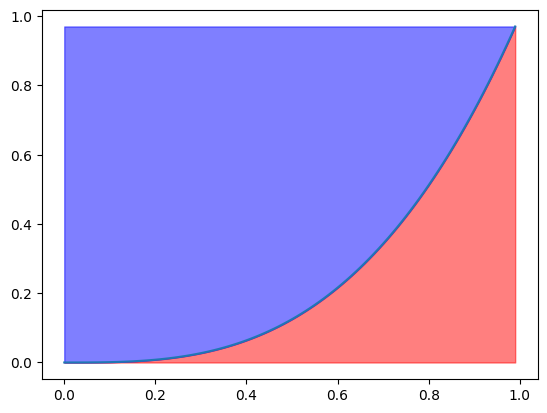

In [23]:
# set a sampling range and rate for x values. In this case from 0 to 1 by increments of .01
graph_x = np.arange(0,1,0.01)
# y values are the cube of the x values (visually it helps make the distance look correct if the plot is a square)
graph_y = graph_x**3

# plot the graph
plt.plot(graph_x,graph_y)

# fill in area above and below the graph
plt.fill_between(graph_x, graph_y, color='red', alpha=.5)
plt.fill_between(graph_x, graph_y, np.max(graph_y), color='blue', alpha=.5)

plt.show()

Now, let's draw some random points from this region and color code them.

In [13]:
# generate 50 random points in the region
points = [(random(), random()) for _ in range(50)]
# color them red or blue based on their position
colors = ['red' if y<x**3 else 'blue' for x,y in points]

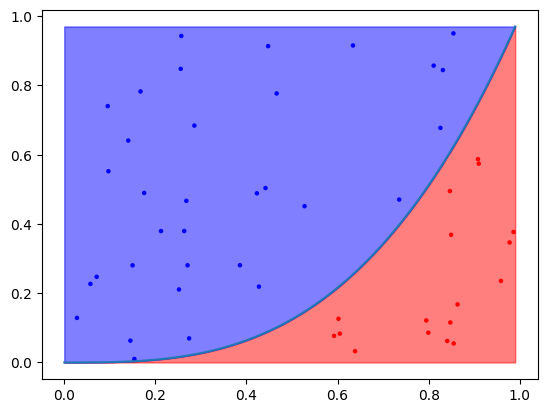

In [28]:
# store the x and y values from the known points in their own lists for scatter plotting
x_values = [point[0] for point in points]
y_values = [point[1] for point in points]

# scatter plot the points
plt.scatter(x_values, y_values, s=5, c=colors)

# plot graph
plt.plot(graph_x,graph_y)

#fill in area above and below the graph
plt.fill_between(graph_x, graph_y, color='red', alpha=.5)
plt.fill_between(graph_x, graph_y, np.max(graph_y), color='blue', alpha=.5)

plt.show()

Now, if we don't know about the regions, but only know about the points we'd be looking at a picture more like this

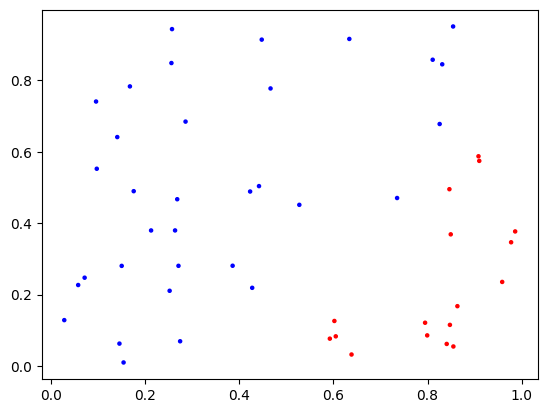

In [30]:
# plot the points
plt.scatter(x_values, y_values, s=5, c=colors)

plt.show()

Now suppose we have a new point and we want to know what color it should be. Let's plot some new points in purple. Keep in mind, they're really red or blue, but we don't know which at the moment.

In [16]:
# generate 10 unknown points
purple_points = [(random(), random()) for _ in range(10)]

# store the x and y values of the unknown points in their own lists for scatterplotting
purple_x_values = [point[0] for point in purple_points]
purple_y_values = [point[1] for point in purple_points]


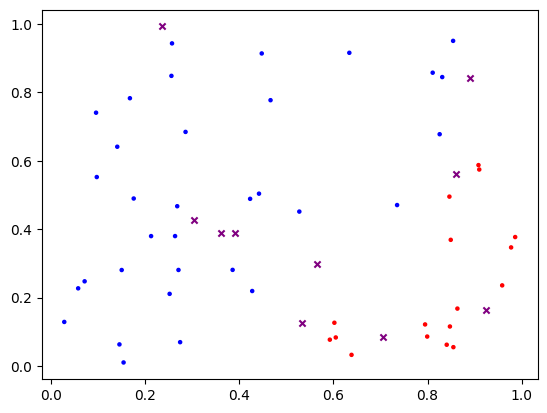

In [17]:

# plot the known points in red and blue
plt.scatter(x_values, y_values, s=5, c=colors)

# plot the unknown points, marked with x's in purple
plt.scatter(purple_x_values, purple_y_values, s=20, c='purple', marker='x')

plt.show()

I bet you can tell which color most of the purple points ought to be by just looking at which color points are around them. This is the whole idea of nearest neighbors. We look at the closest few points to an unknown point and use what we know about the neighbors to decide about our unknown point. Let's make a little line connecting each one of our purple points to its nearest neighbor

In [18]:
# for each unknown point, calculate the nearest known point
nearest_neighbors = [nearest_neighbor(purple_point, points) for purple_point in purple_points]

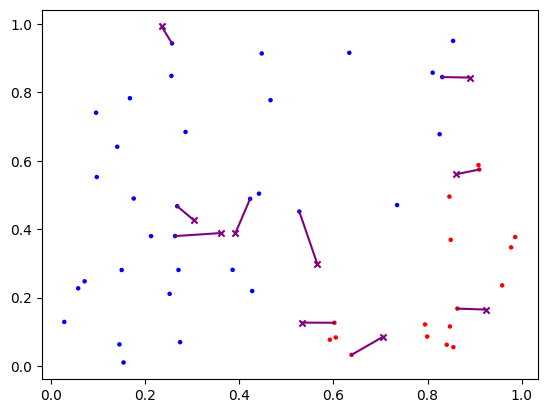

In [19]:
# store the x and y values of the nearest points in their own lists for scatterplotting
nn_x_values = [neighbor[0] for neighbor in nearest_neighbors]
nn_y_values = [neighbor[1] for neighbor in nearest_neighbors]

# draw lines between each unknown point and its nearest neighbor
for i in range(len(purple_points)):
    xs = [purple_x_values[i], nn_x_values[i]]
    ys = [purple_y_values[i], nn_y_values[i]]
    plt.plot(xs, ys, c='purple')

# plot the nearest neighbors in orange
# plt.scatter(nn_x_values, nn_y_values, s=20, c='orange', marker='x')

# plot the known points in red and blue
plt.scatter(x_values, y_values, s=5, c=colors)

# plot the unknown points in purple
plt.scatter(purple_x_values, purple_y_values, s=20, c='purple', marker='x')

plt.show()

Putting our regions back in we can see that for the most part we'll have connected our purple points with a point of the appropriate color. 

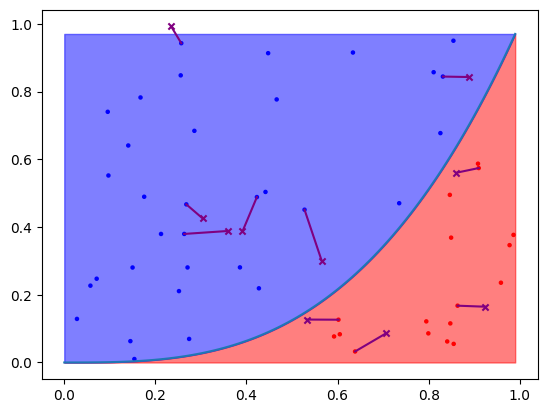

In [29]:
# plot graph
plt.plot(graph_x,graph_y)

#fill in area above and below the graph
plt.fill_between(graph_x, graph_y, color='red', alpha=.5)
plt.fill_between(graph_x, graph_y, np.max(graph_y), color='blue', alpha=.5)

# draw lines between each unknown point and its nearest neighbor
for i in range(len(purple_points)):
    xs = [purple_x_values[i], nn_x_values[i]]
    ys = [purple_y_values[i], nn_y_values[i]]
    plt.plot(xs, ys, c='purple')

# plot the known points in red and blue
plt.scatter(x_values, y_values, s=5, c=colors)

# plot the unknown points in purple
plt.scatter(purple_x_values, purple_y_values, s=20, c='purple', marker='x')

plt.show()

There will be some error, but overall this method is pretty effective if the regions are distinct and we know about lots of points. If the regions are more complex or a bit intermingled this might be harder. In order to make our method better, we might ask about the nearest 3 neighbors or the nearest 5. This is where the k in KNN comes from. The k is the number of neighbors we consider.